In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
dataset = pd.read_csv('../datasets/GlobalLandTemperaturesByCountry.csv')

# Filtering data for Norway
netherlands_data = dataset[dataset['Country'] == 'Netherlands']

# find median of temperature
median_temperature = netherlands_data['AverageTemperature'].median()

# fill missing values with median
netherlands_data['AverageTemperature'] = netherlands_data['AverageTemperature'].fillna(median_temperature)

# Convert the 'dt' column to datetime format
netherlands_data['dt'] = pd.to_datetime(netherlands_data['dt'], format='%Y-%m-%d')

# Extract features from the datetime column
netherlands_data['timestamp'] = netherlands_data['dt'].astype(int) // 10**9
# print(netherlands_data['timestamp'][0])

In [12]:
X = netherlands_data[['timestamp']]
y = netherlands_data['AverageTemperature']
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X.values, y) 

LinearRegression()

In [13]:
new_datetime = pd.to_datetime('1850-06-30', format='%Y-%m-%d')
new_timestamp = new_datetime.timestamp()
new_temperature = model.predict([[new_timestamp]])

new_datetime_2 = pd.to_datetime('2050-06-30', format='%Y-%m-%d')
new_timestamp_2 = new_datetime_2.timestamp()
new_temperature_2 = model.predict([[new_timestamp_2]])

print('date:', new_datetime ,'Predicted temperature:', new_temperature)
print('date:', new_datetime_2 ,'Predicted temperature:', new_temperature_2)

date: 1850-06-30 00:00:00 Predicted temperature: [9.39435174]
date: 2050-06-30 00:00:00 Predicted temperature: [9.93416777]


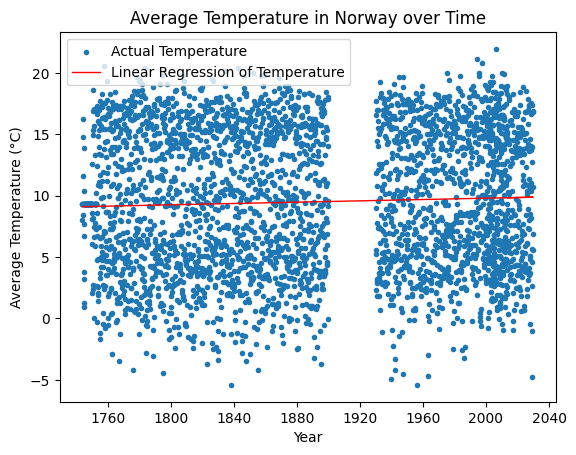

In [16]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature in Norway over Time')
plt.scatter(netherlands_data['dt'], netherlands_data['AverageTemperature'], marker='.', label='Actual Temperature')
plt.plot(netherlands_data['dt'], model.predict(X.values), color='red', linewidth=1, label='Linear Regression of Temperature')


plt.savefig('../output-results/netherlandsAvgTemp.png')
plt.legend(loc=2)

plt.show()